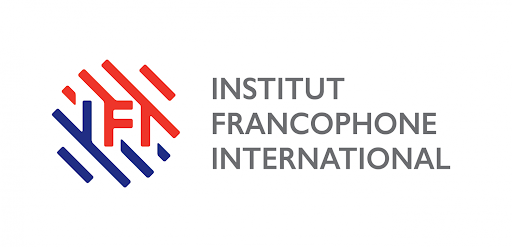
---
---
<h1 align="center">Reconnaissance d'objet</h1>
<h3 align="center">projet de classification des scènes naturelles d'image a l'aide de l'apprentissage profonde<h3>

---
**Objectif :** 
Le terme de scènes naturelles se réfère à l’ensemble des images représentant le monde réel dans lequel on évolue et qui peuvent subir un changement d’état sous l’effet des actions des êtres vivants. 

Ces scènes qui peuvent être Intérieures ou Extérieures renferment des catégories ou classe d’image telles que :


*   Scène Intérieure : Cuisine, Lit de maison, Salle à manger, Bureau, etc.
*   Scène Extérieure : Jardin, Rue, Batiment, Forêt, Rivière, Mer, Paysage, glacier, Montagne, etc.

Alors a travers cette étude, notre objectif se porte sur l’expérimentation et l'implementation plusieurs modèles pour classer les images de scènes a travers l'apprentissage profonde d'où le développement des modèles se fait de 2 manières, 

*    en construisant le modèle à partir de zéro 
*    en utilisant des modèles pré-entraînés. 


#**Apprentissage profonde ou Deep Learning(en anglais)**

Le deep learning a révolutionné l'intelligence artificielle en nous aidant à construire des machines et des systèmes dont on ne rêvait que dans le passé. En substance, le Deep Learning est une sous-secte du Machine Learning qui utilise des réseaux de neurones artificiels profonds pour résoudre les problèmes de Apprentissage automatique .

*       Un réseau neuronal profond est juste un réseau neuronal avec de nombreuses couches empilées les unes sur les autres - plus le nombre de couches est élevé, plus le réseau est profond.

A travers notre travail , nous avons utilise deux de ces frameworks Deep Learning.
*             Tensorflow
*             Keras

Tensorflow est un cadeau de Google aux développeurs impliqués dans l'apprentissage automatique et c'est la bibliothèque la plus utilisée dans le développement de modèles de Deep Learning, il s'agit d'une plate-forme open-source.

Keras, à l'autre extrémité, est une API de haut niveau qui repose sur TensorFlow. Il est extrêmement convivial et comparativement plus facile que TensorFlow. 

**L'apprentissage par transfert :**

*  C'est un procede qui vous permet de recycler la couche finale d'un modèle existant, ce qui entraîne une diminution significative non seulement du temps de formation, mais également de la taille de l'ensemble de données requis. parmi l'un des modèles les plus connus pouvant être utilisés pour l'apprentissage par transfert est **Inception V3**. Ce modèle a été initialement formé sur plus d'un million d'images de 1000 classes sur des machines très puissantes. Être en mesure de recycler la couche finale signifie que vous pouvez conserver les connaissances acquises par le modèle lors de sa formation initiale et les appliquer à votre plus petit ensemble de données, ce qui permet d'obtenir des classifications très précises sans nécessiter de formation approfondie ni de puissance de calcul.


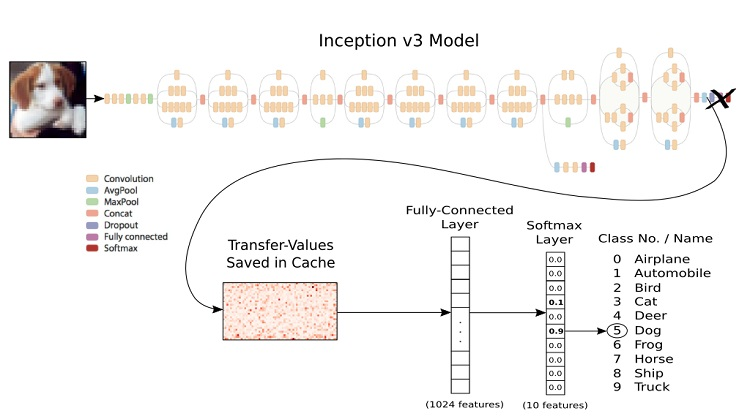

*   **VGG16 :** est un modèle de réseau de neurones convolutif proposé par K. Simonyan et A. Zisserman de l'Université d'Oxford dans le document «Very Deep Convolutional Networks for Large-Scale Image Recognition». Le modèle atteint 92,7% de précision de test top-5 dans ImageNet, qui est un ensemble de données de plus de 14 millions d'images appartenant à 1000 classes. C'était l'un des modèles célèbres soumis à l' ILSVRC-2014 . Il apporte une amélioration par rapport à AlexNet en remplaçant les grands filtres de la taille d'un noyau (11 et 5 dans la première et la deuxième couche convolutive, respectivement) par plusieurs filtres de la taille d'un noyau 3 × 3 l'un après l'autre. VGG16 a été formé pendant des semaines et utilisait des GPU NVIDIA Titan Black.

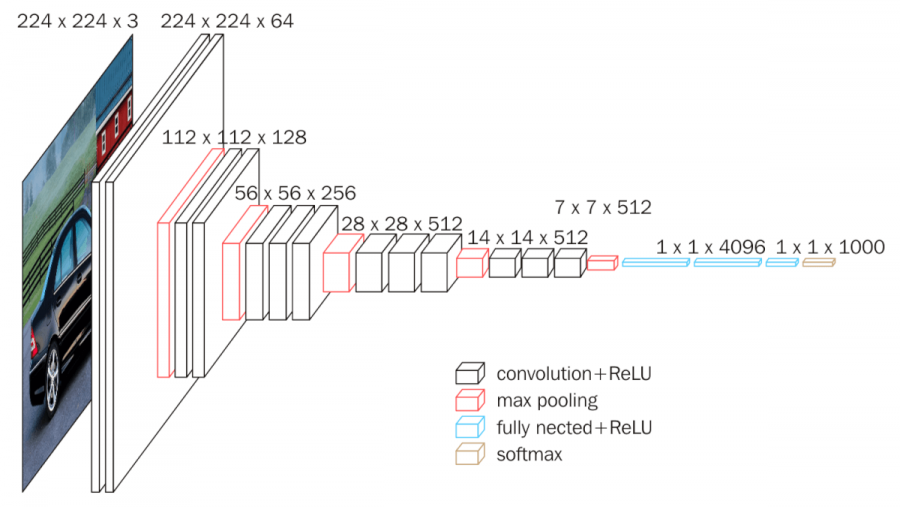

*   **ResNet50** est une variante du modèle ResNet qui a 48 couches de convolution avec 1 couche MaxPool et 1 couche de pool moyen. Il a 3,8 x 10 ^ 9 opérations en virgule flottante. Vous pouvez charger une version pré-entraînée du réseau formée sur plus d'un million d'images de la base de données ImageNet. Le réseau pré-entraîné peut classer les images en 1000 catégories d'objets, telles que le clavier, la souris, le crayon et de nombreux animaux. En conséquence, le réseau a appris de riches représentations de caractéristiques pour une large gamme d'images. Le réseau a une taille d'entrée d'image de 224 x 224.

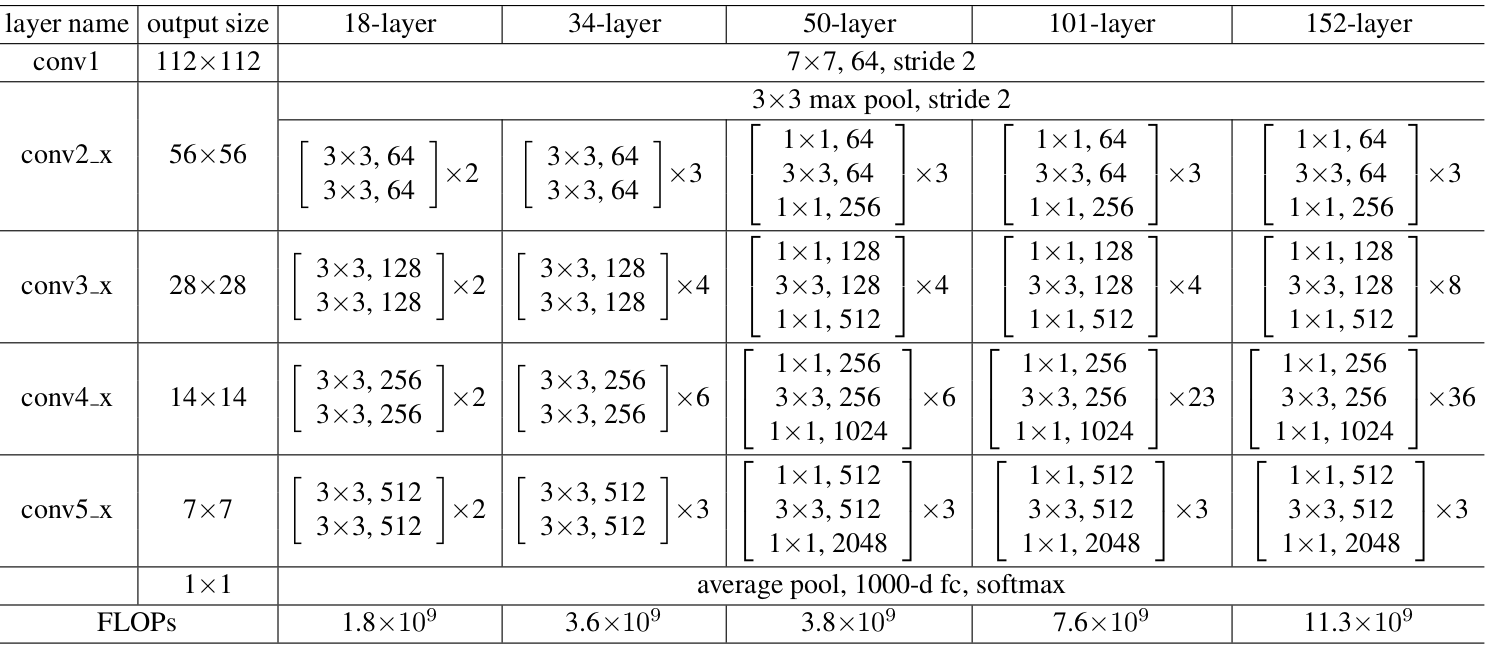


#### **Vérifiez la connexion et path du projet**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/'My Drive'/Scene_naturelle-classification/DATA

/content/drive/My Drive/Scene_naturelle-classification/DATA


In [ ]:
import tensorflow as tf
%cd '/content/drive/MyDrive/Scene_naturelle-classification/'
import librys
import librypre

print("TensorFlow version :", tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

/content/drive/MyDrive/Scene_naturelle-classification
TensorFlow version : 2.4.1
Num GPUs Available:  1


#### **installation des Frameworks**

In [ ]:
librys.trainSampleView()

Output hidden; open in https://colab.research.google.com to view.

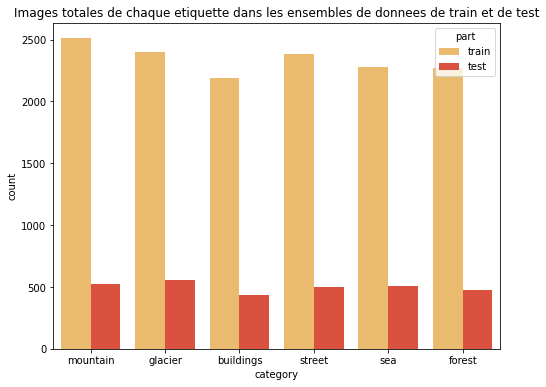

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


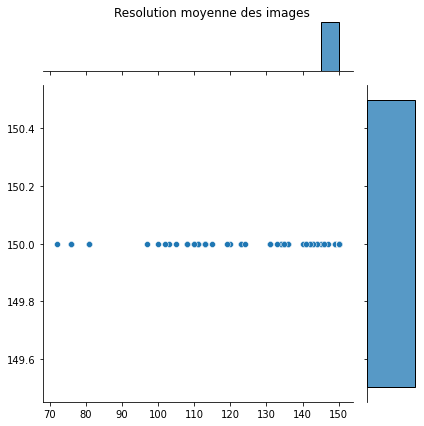

In [ ]:
img_shape = librys.dataInfo(img_res=True)

#### **Prétraitement des images**




In [ ]:
param_augment = {"rotation_range":20,"width_shift_range":0.2,"height_shift_range":0.2,"shear_range":0.2,"brightness_range":(0.1,0.9),"zoom_range":[0.2,1.5],"channel_shift_range":150,"horizontal_flip":True,"fill_mode":'nearest'}

categories, total_categories, train_data, test_data, labels_dict = librys.dataPrep(image_shape=(img_shape[0],img_shape[1]),
                                                                                    color_mode='rgb',
                                                                                    batch_size=64,
                                                                                    class_mode='categorical',
                                                                                    image_augmentation=param_augment)

Found 14035 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


---
### **(InceptionV3) Importer et former un modèle pré-formé**
---

In [ ]:
IV3_model = librypre.inceptionV3Modeling(input_shape=img_shape, output_label=total_categories, verbose=True)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 149, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
IV3_trained_model, history = librys.trainModel(model=IV3_model,
                                              data_train=train_data,
                                              data_validation=test_data,
                                              early_stop=True,
                                              patience=10,
                                              checkpoint=True,
                                              model_name="InceptionV3_1",
                                              num_epochs=10,
                                              verbose=1)

Epoch 1/10
219/219 [==============================] - 124s 524ms/step - loss: 1.3365 - accuracy: 0.6207 - val_loss: 0.7023 - val_accuracy: 0.8869

Epoch 00001: val_loss improved from inf to 0.70235, saving model to models/InceptionV3_1.h5
Epoch 2/10
219/219 [==============================] - 113s 514ms/step - loss: 0.9184 - accuracy: 0.7675 - val_loss: 0.6858 - val_accuracy: 0.8879

Epoch 00002: val_loss improved from 0.70235 to 0.68584, saving model to models/InceptionV3_1.h5
Epoch 3/10
219/219 [==============================] - 112s 512ms/step - loss: 0.8841 - accuracy: 0.7806 - val_loss: 0.6495 - val_accuracy: 0.8984

Epoch 00003: val_loss improved from 0.68584 to 0.64946, saving model to models/InceptionV3_1.h5
Epoch 4/10
219/219 [==============================] - 112s 513ms/step - loss: 0.8466 - accuracy: 0.7963 - val_loss: 0.6386 - val_accuracy: 0.9076

Epoch 00004: val_loss improved from 0.64946 to 0.63861, saving model to models/InceptionV3_1.h5
Epoch 5/10
219/219 [============

---
#### **(InceptionV3) Évaluation du modèle**
---

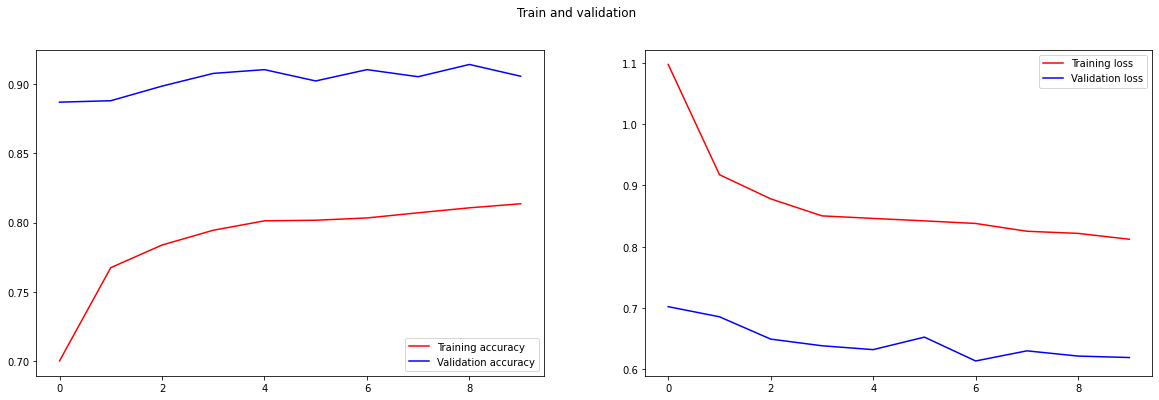




47/47 [==============================] - 7s 139ms/step - loss: 0.6145 - accuracy: 0.9103
validation accuracy : 91.03333353996277%
validation loss : 0.6144618988037109


In [ ]:
librys.modelEvaluation(model=IV3_trained_model, history=history, data_validation=test_data)

---
#### **(InceptionV3)Prédire de nouvelles images sans étiquette**
---

In [ ]:
librys.predictNewImagesInBatch(model=IV3_trained_model, categories_dict=labels_dict, image_shape=img_shape)

Output hidden; open in https://colab.research.google.com to view.

---
---
#### **(VGG16) Importer et former un modèle pré-formé**

In [ ]:
VGG16_model = librypre.vgg16Modeling(input_shape=img_shape, output_label=total_categories, verbose=True)

In [ ]:
VGG16_trained_model, history = librys.trainModel(model=VGG16_model,
                                                data_train=train_data,
                                                data_validation=test_data,
                                                early_stop=True,
                                                patience=10,
                                                checkpoint=True,
                                                model_name="VGG16_1",
                                                num_epochs=50,
                                                verbose=1)

Epoch 1/50
219/219 [==============================] - 118s 528ms/step - loss: 1.5368 - accuracy: 0.4255 - val_loss: 0.8882 - val_accuracy: 0.7782

Epoch 00001: val_loss improved from inf to 0.88821, saving model to models/VGG16_1.h5
Epoch 2/50
219/219 [==============================] - 118s 539ms/step - loss: 1.2300 - accuracy: 0.5864 - val_loss: 0.8228 - val_accuracy: 0.8244

Epoch 00002: val_loss improved from 0.88821 to 0.82278, saving model to models/VGG16_1.h5
Epoch 3/50
219/219 [==============================] - 117s 534ms/step - loss: 1.1856 - accuracy: 0.6174 - val_loss: 0.8601 - val_accuracy: 0.7772

Epoch 00003: val_loss did not improve from 0.82278
Epoch 4/50
219/219 [==============================] - 117s 532ms/step - loss: 1.1671 - accuracy: 0.6237 - val_loss: 0.8475 - val_accuracy: 0.8016

Epoch 00004: val_loss did not improve from 0.82278
Epoch 5/50
219/219 [==============================] - 118s 537ms/step - loss: 1.1487 - accuracy: 0.6338 - val_loss: 0.8151 - val_accur

#### **(VGG16) Évaluer le modèle**

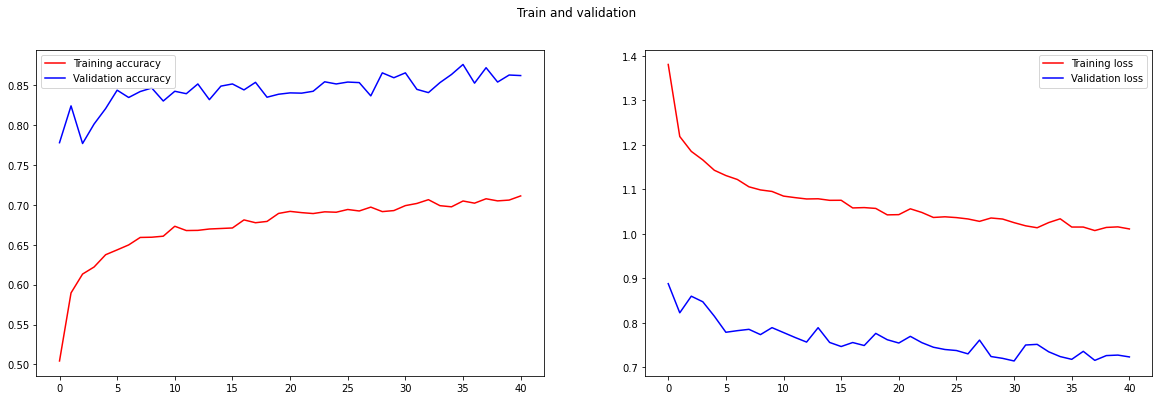




47/47 [==============================] - 8s 171ms/step - loss: 0.7153 - accuracy: 0.8647
validation accuracy : 86.46666407585144%
validation loss : 0.7152923941612244


In [ ]:
librys.modelEvaluation(model=VGG16_trained_model, history=history, data_validation=test_data)

              precision    recall  f1-score   support

   buildings       0.88      0.90      0.89       437
      forest       0.95      0.98      0.97       474
     glacier       0.77      0.84      0.80       553
    mountain       0.83      0.76      0.79       525
         sea       0.91      0.82      0.86       510
      street       0.88      0.91      0.89       501

    accuracy                           0.86      3000
   macro avg       0.87      0.87      0.87      3000
weighted avg       0.87      0.86      0.86      3000





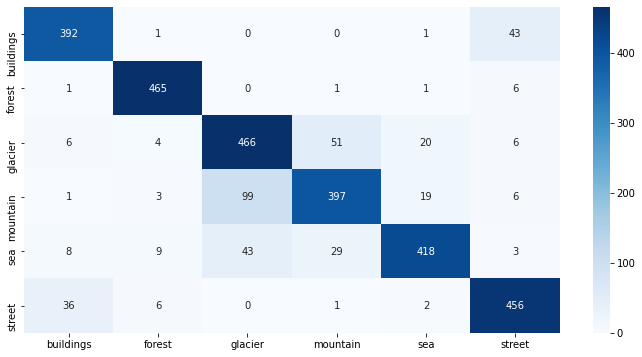

In [ ]:
librys.modelReport(model=VGG16_trained_model, data_validation=test_data)

##### **(VGG16) Prédire de nouvelles images sans étiquette**

In [ ]:
librys.predictNewImagesInBatch(model=VGG16_trained_model, categories_dict=labels_dict, image_shape=img_shape)

Output hidden; open in https://colab.research.google.com to view.

---
---
#### **(ResNet50) Importer et former un modèle pré-formé**

In [ ]:
ResNet50_model = librypre.resNet50Modeling(input_shape=img_shape, output_label=total_categories, verbose=True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 149, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 155, 156, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
ResNet50_trained_model, history = librys.trainModel(model=ResNet50_model,
                                                data_train=train_data,
                                                data_validation=test_data,
                                                early_stop=True,
                                                patience=10,
                                                checkpoint=True,
                                                model_name="ResNet50_1",
                                                num_epochs=100,
                                                verbose=1)

NameError: ignored

#### **(ResNet50) Évaluer le modèle**

In [ ]:
librys.modelEvaluation(model=ResNet50_trained_model, history=history, data_validation=test_data)

In [ ]:
librys.modelReport(model=ResNet50_trained_model, data_validation=test_data)

#### **(ResNet50) Prédire de nouvelles images sans étiquette**

In [ ]:
librys.predictNewImagesInBatch(model=ResNet50_trained_model, categories_dict=labels_dict, image_shape=img_shape)